# **YES BANK STOCK CLOSING PREDICTION**











> **PROJECT TYPE- REGRESSION**

> **CONTRIBUTION- TEAM**

1.   **NEHA JADHAV**
2.   **AKRITI PANCHBUDHE**
3.   **AKANKSHA JADHAV**

# **PROJECT SUMMARY**

**Stock Price Prediction**-
Predicting the stock market has been the bane and goal of investors since its inception. Every day billions of dollars are traded on the stock exchange, and behind every dollar is an investor hoping to make a profit in one way or another.

Entire companies rise and fall daily depending on market behaviour. If an investor is able to accurately predict market movements, he offers a tantalizing promise of wealth and influence. 
Today, so many people are making money staying at home trading in the stock market. It is a plus point for you if you use your experience in the stock market and your machine learning skills for the task of stock price prediction.

Let’s see how to predict stock prices using Machine Learning and the python programming language.

# GITHUB LINK-

https://github.com/nehaa54/StockClosingPricePred.git

# **PROBLEM STATEMENT**

**Problem Statement-Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.**

**What is stock?**

A Stock or share (also known as a company’s 'equity') is a financial instrument that represents ownership in a company. Units of stock are called "shares." Stocks are bought and sold predominantly on stock exchanges, though there can be private sales as well, and are the foundation of many individual investors' portfolios.

Since, we've the YES BANK Stock price dataset which has the monthly stock prices. It contains the following features:

**Open** - The opening price is the price at which a security first trades upon the opening of an exchange on a trading day i.e. buyers and sellers meet to make deals with the highest bidder, the opening price may not have to be the same as the last day's closing price.

**High** - The high is the highest price at which a stock traded during a period.

**Low** -The low is the highest price at which a stock traded during a period.

**Close** -The closing price is a stock's trading price at the end of a trading day. This makes it the most recent price of a stock until the next trading session. The closing price is calculated as the weighted average price of the last 30 minutes, i.e. from 3:00 PM to 3:30 PM in case of equity.

In [119]:
#importing the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# **Importing and loading the data**

In [120]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
#Using pandas and "read_csv" function to read the yesbank_stockprices csv fie
dataset= pd.read_csv('/content/drive/MyDrive/Capstone project-02/data_YesBank_StockPrices.csv')

# **DATA EXPLORATION**

In [122]:
#Getting the first 5 rows of dataset
dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [123]:
#checking the last 5 rows of the dataset
dataset.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [124]:
#checking the information of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [125]:
#checking the No. of rows and No. of columns of the dataset
dataset.shape

(185, 5)

In [126]:
#columns containing numerical values
numerical_col = dataset.describe().columns
numerical_col

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

In [127]:
#This will return the date column as type DateTime from object type
from datetime import datetime
dataset['Date'] = pd.to_datetime(dataset['Date'].apply(lambda x: datetime.strptime(x,'%b-%y')))

In [128]:
#description of the data in DataFrame
dataset.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [129]:
#Checking if any null value is present in the dataset
dataset.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [130]:
#Checking if duplicates are present
len(dataset[dataset.duplicated()])

0

# **CHECKING FOR OUTLIERS**

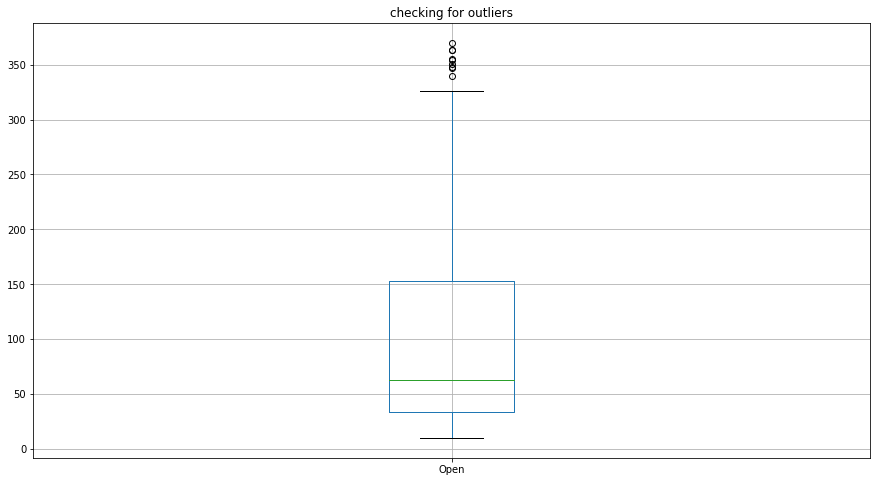

In [131]:
#Boxplot outlier test
plt.figure(figsize=(15,8))
dataset.boxplot('Open')
plt.title('checking for outliers')
plt.show()

# **EXOLORATORY DATA ANALYSIS**

**DATA DISTRIBUTION MEAN AND MEDIAN OF EACH INDEPENDENT VARIABLE**

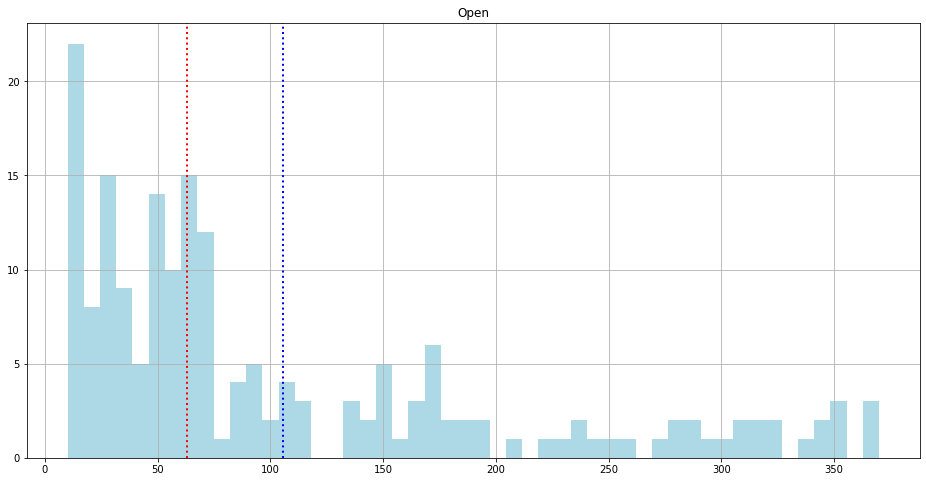

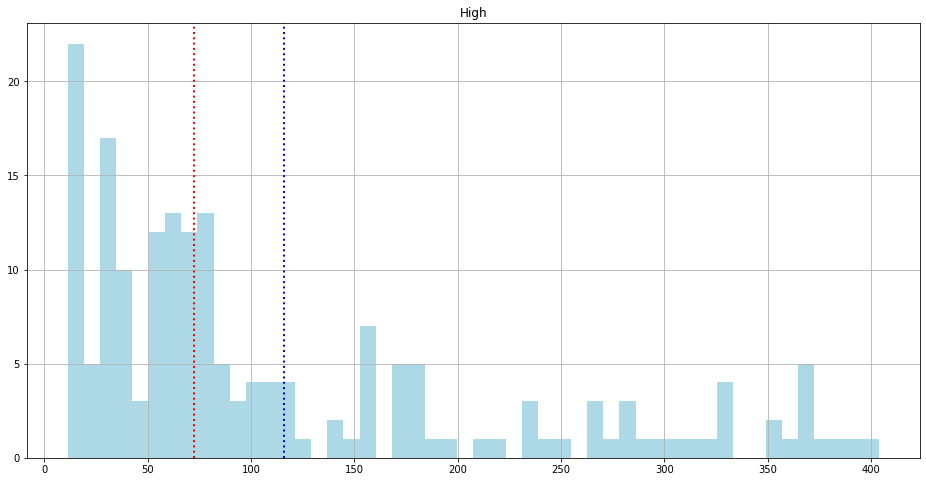

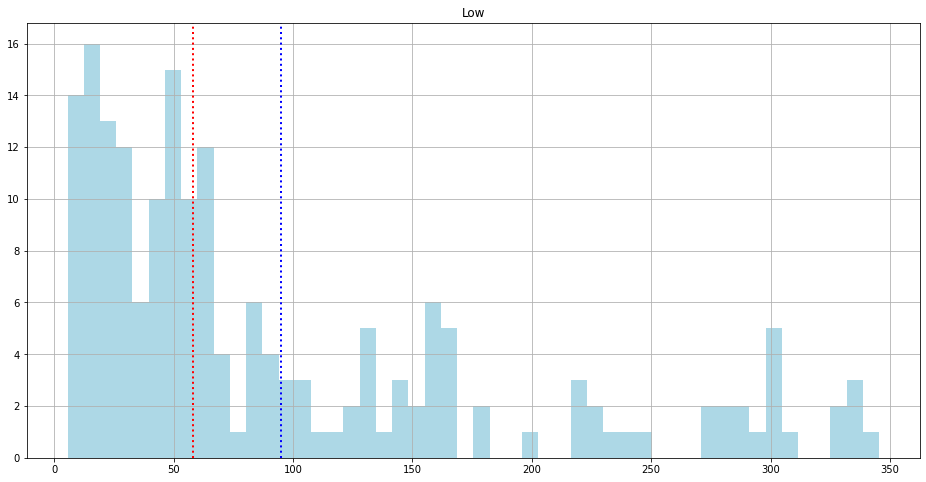

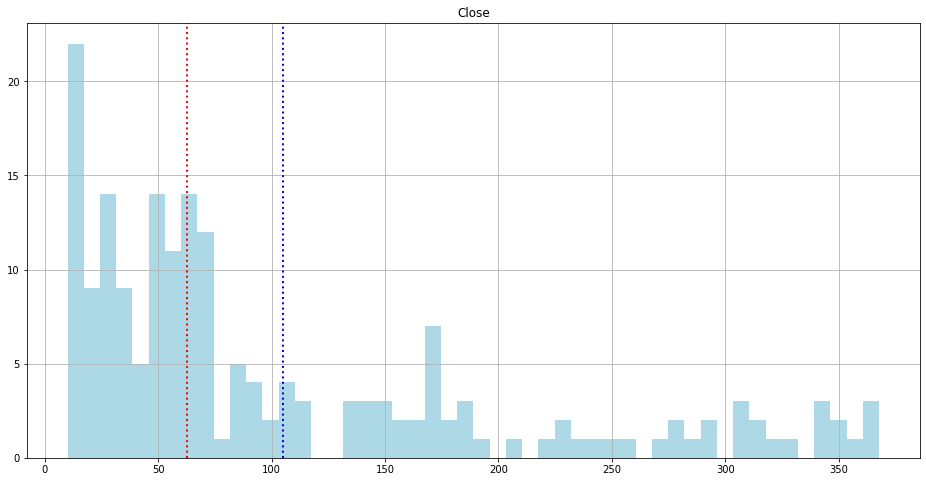

In [132]:
#mean and median of each independent variable
for i in numerical_col[:]:
  fig = plt.figure(figsize=(16,8))
  ax = fig.gca()
  features = dataset[i]
  label = dataset['Close']
  features.hist(bins = 50,ax = ax,color = 'lightblue')
  ax.axvline(features.mean(),color = 'blue',linestyle = 'dotted',linewidth = 2)
  ax.axvline(features.median(),color = 'red',linestyle = 'dotted',linewidth = 2)
  ax.set_title(i)

**We can conclude that data is not normally distributed as mean is higher than median in all features. By using logarithmic transformation, we have to convert our columns into normal distribution dataset.**

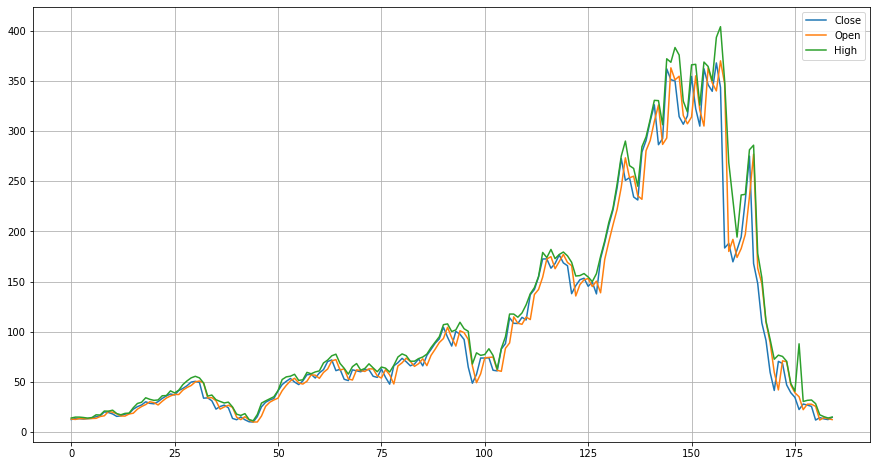

In [133]:
#line plot for visializing 'Close','Open' and 'High' columns
plt.figure(figsize=(15,8))
plt.plot(dataset['Close'])
plt.plot(dataset['Open'])
plt.plot(dataset['High'])
plt.legend(['Close','Open','High'])
plt.grid()

**NORMALIZATION OF DEPENDENT VARIABLE**

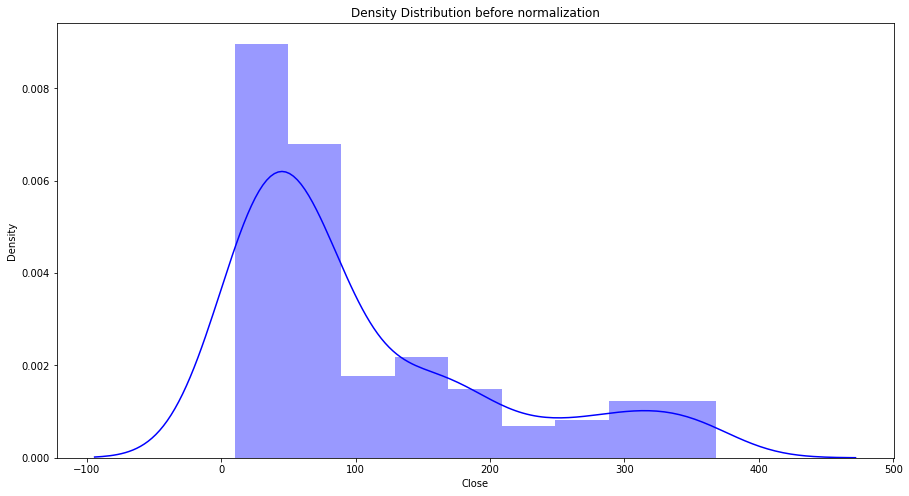

In [134]:
#density distribution plot for dependent variable 'Close' before normalization
plt.figure(figsize=(15,8))
plt.title('Density Distribution before normalization')
sns.distplot(dataset['Close'],color='blue')
plt.show()

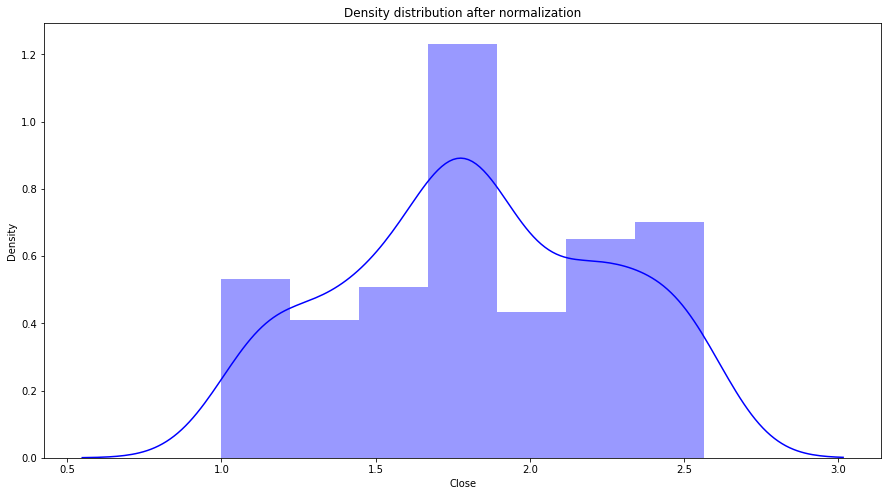

In [135]:
#Density distribution plot for dependent variable 'Close' after Normalization
plt.figure(figsize=(15,8))
plt.title('Density distribution after normalization')
sns.distplot(np.log10(dataset['Close']),color='blue')
plt.show()

**NORMALISATION FOR INDEPENDENT VARIABLES**

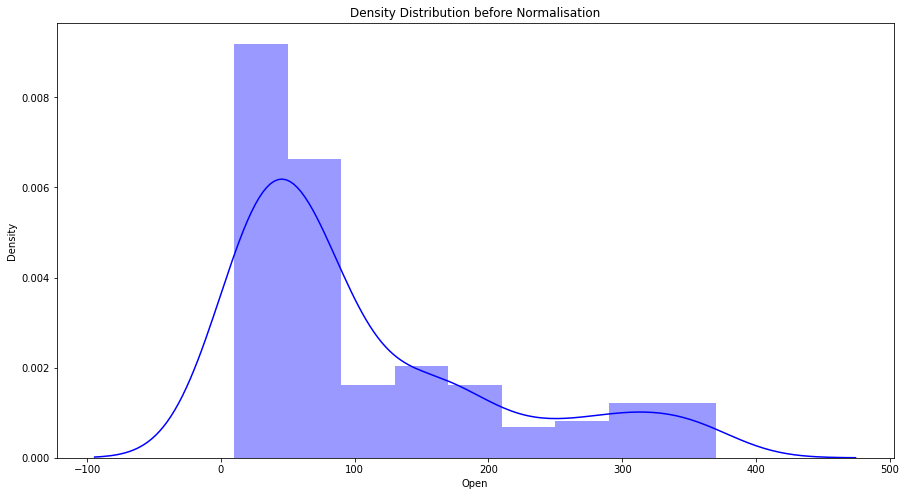

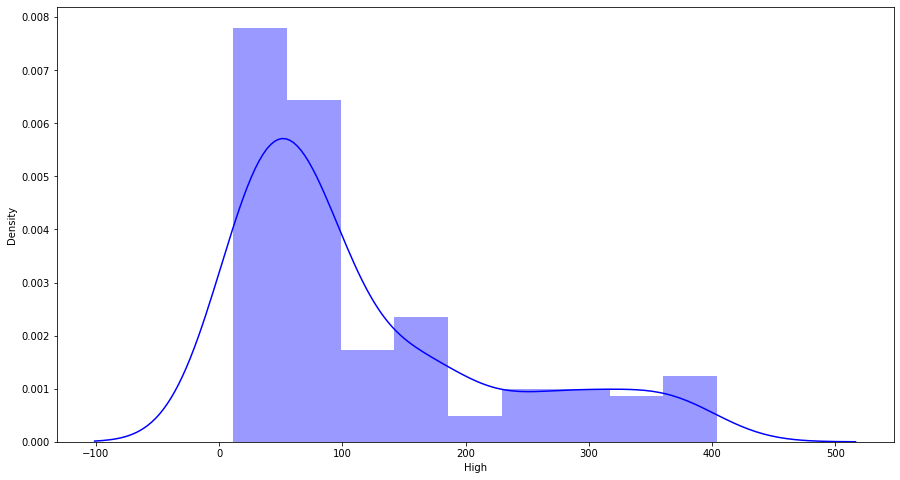

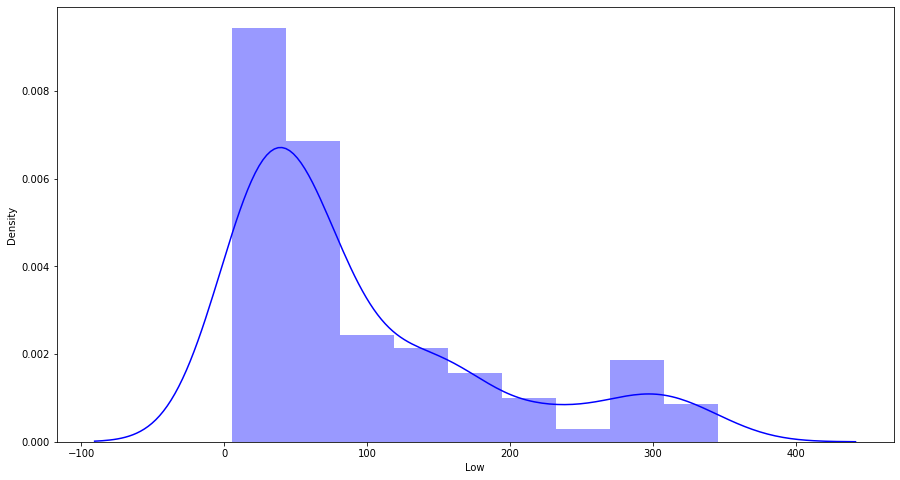

In [136]:
#Density Distribution plot for Independent Variables before Normalisation
plt.figure(figsize=(15,8))
plt.title('Density Distribution before Normalisation')
sns.distplot(dataset['Open'], color='blue')

plt.figure(figsize=(15,8))
sns.distplot(dataset['High'], color='blue')

plt.figure(figsize=(15,8))
sns.distplot(dataset['Low'], color='blue')

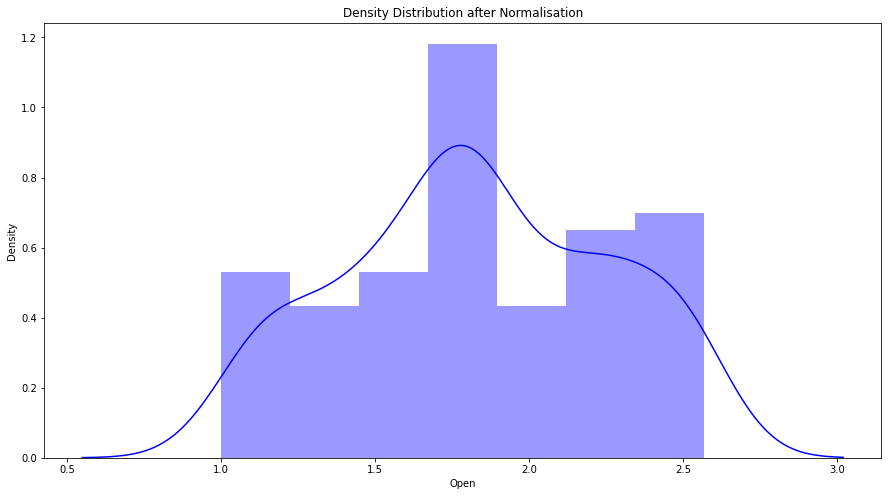

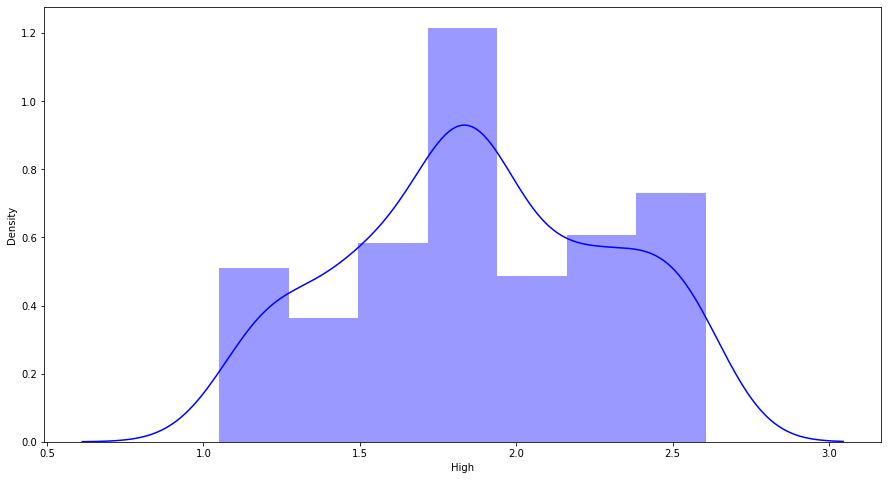

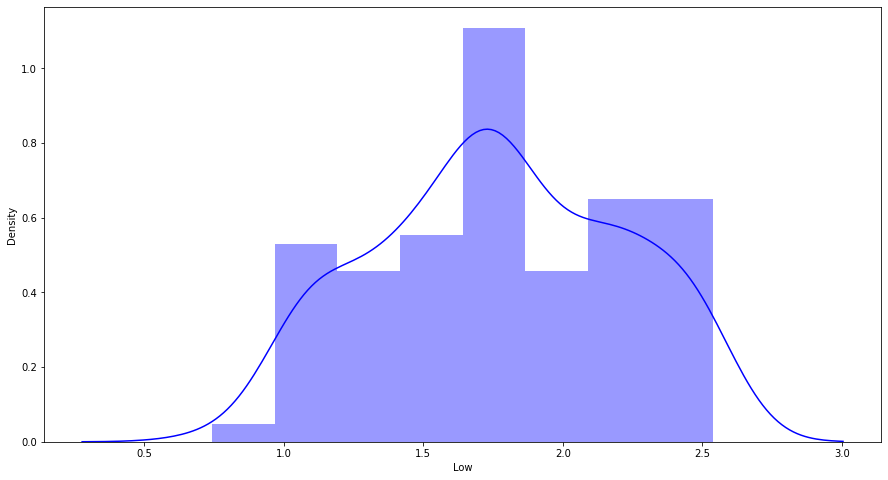

In [137]:
#Density Distribution Plot for Independent Variables after Normalisation

plt.figure(figsize=(15,8))
plt.title('Density Distribution after Normalisation')
sns.distplot(np.log10(dataset['Open']), color='blue')

plt.figure(figsize=(15,8))
sns.distplot(np.log10(dataset['High']), color='blue')

plt.figure(figsize=(15,8))
sns.distplot(np.log10(dataset['Low']), color='blue')

# **FINDING CORRELATION BETWEEN VARIABLES**

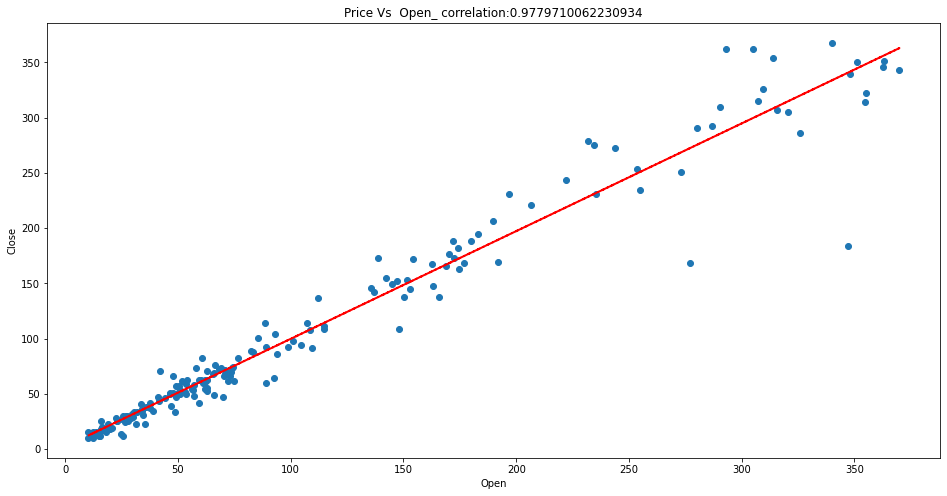

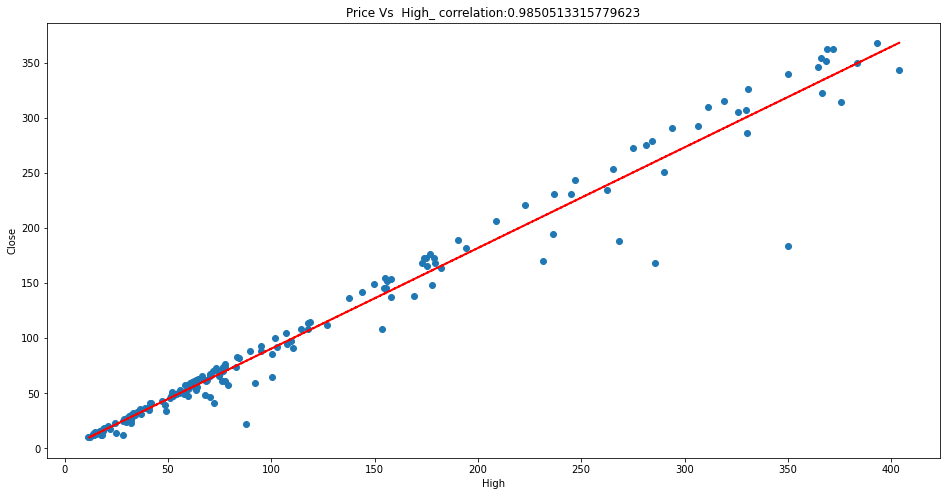

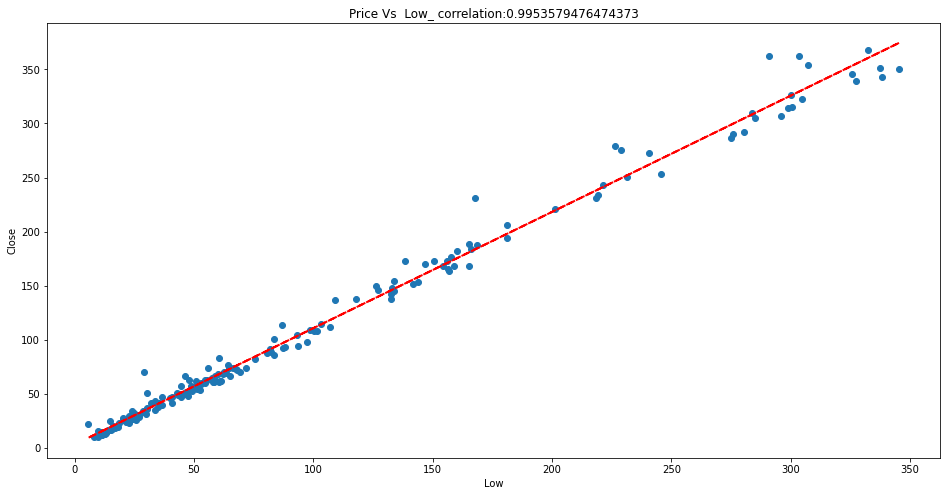

In [139]:
#finding the correlation between the Variables using line plot
for col in numerical_col[:-1]:
  fig = plt.figure(figsize = (16,8))
  ax = fig.gca()
  features = dataset[col]
  label = dataset['Close']
  correlation = features.corr(label)
  plt.scatter(x = features,y = label)
  plt.xlabel(col)
  plt.ylabel('Close')
  plt.title('Price Vs  ' + col + '_ correlation:' + str(correlation))
  z = np.polyfit(dataset[col],dataset['Close'],1)
  y_hat = np.poly1d(z)(dataset[col])
  plt.plot(dataset[col] , y_hat, "r--",lw = 2)
plt.show()

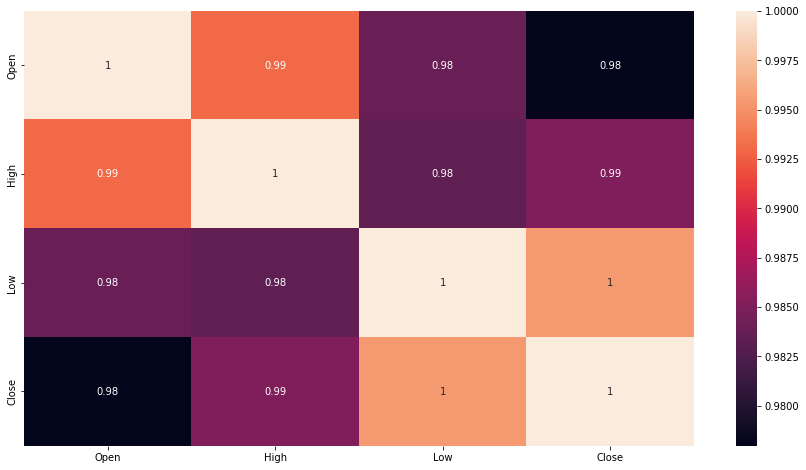

In [140]:
# Correlation Between the Variables using heatmap
corr = dataset.corr()
plt.figure(figsize = (15,8))
sns.heatmap(abs(corr),annot = True)

# **MODELLING**

In [141]:
# Splitting our data into Dependent and Independent Variables
x = dataset.drop(columns=['Close','Date']).apply(zscore)
y = np.log10(dataset['Close'])

**TRAIN TEST SPLIT**

In [142]:
# Creating Testing and Training Datasets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state = 1)

In [143]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(148, 3)
(37, 3)
(148,)
(37,)


# **4 models of Regression**



1. **Linear Regression :-Linear regression is one of the easiest and most popular Machine Learning algorithms. It is a statistical method that is used for predictive analysis.Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence called as linear regression.**

2. **Lasso :-Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).**

3. **Ridge :-Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values.**

4. **Elastic Net :-Elastic net is a popular type of regularized linear regression that combines two popular penalties, specifically the L1 and L2 penalty functions. ... Elastic Net is an extension of linear regression that adds regularization penalties to the loss function during training.**

> **Cross-validation :-It is a resampling procedure used to evaluate machine learning models on a limited data sample. Basically Cross Validation is a technique using which Model is evaluated on the dataset on which it is not trained i.e. it can be a test data or can be another set as per availability or feasibility.**




# **LINEAR REGRESSION**

In [144]:
#Creating the Linear Regression Object and Training the model
regressor = LinearRegression()
reg_model = regressor.fit(x_train,y_train)

In [145]:
#Regression score
regressor.score(x_train,y_train)

0.8146653424416905

In [146]:
#finding the regression coeffiecients
regressor.coef_

array([-0.04654099,  0.19795929,  0.23173905])

In [147]:
#finding the regression intercept
regressor.intercept_

1.8292785179315048

**PREDICTION of Linear Regression**

In [148]:
#Prediction of Linear Regression
y_test_pred = regressor.predict(x_test)
y_train_pred = regressor.predict(x_train)

#**EVALUATION METRICS for Linear Regression**

In [149]:
# Test Performance
print("MSE :",mean_squared_error(y_test, y_test_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_test_pred)))
print("MAE :",mean_absolute_error(y_test, y_test_pred))
print("R2 :",r2_score(y_test, y_test_pred))

MSE : 0.03158251893048738
RMSE : 0.17771471219481907
MAE : 0.15128511034606282
R2 : 0.8225699915389754


In [150]:
# Train Performance
print("MSE :",mean_squared_error(y_train, y_train_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_train, y_train_pred)))
print("MAE :",mean_absolute_error(y_train, y_train_pred))
print("R2 :",r2_score(y_train, y_train_pred))

MSE : 0.033659395765946676
RMSE : 0.18346497149577812
MAE : 0.1559169766820056
R2 : 0.8146653424416905


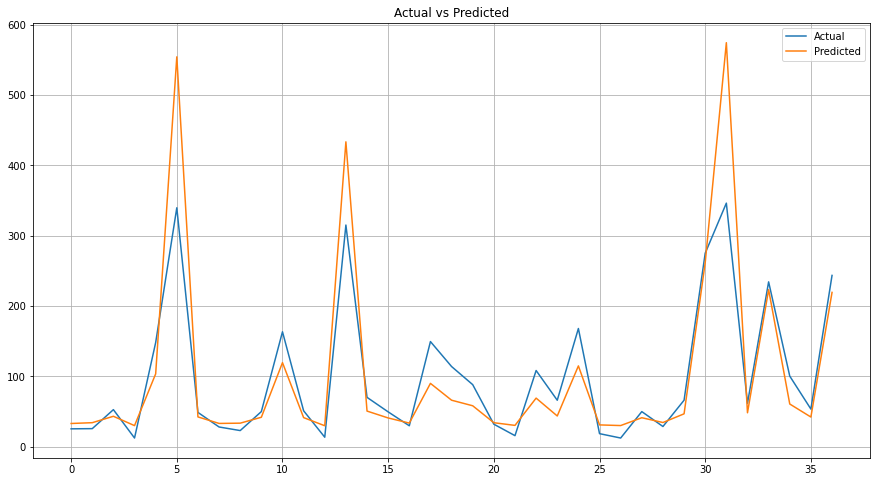

In [151]:
# Linear Regression Plotting
plt.figure(figsize=(15,8))
plt.title('Actual vs Predicted')
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_test_pred))
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

#**Lasso Regression**

In [152]:
#importing lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.005,max_iter=3000)
lasso_model = lasso.fit(x_train,y_train)

In [153]:
#checking the Regression score
lasso.score(x_train,y_train)

0.8143673030311667

**Prediction of Lasso Regression**

In [154]:
#Prediction
y_lasso_pred = lasso.predict(x_test)

**Evaluation Matrices**

In [155]:
# Test Performance
print("MSE :",mean_squared_error(y_test,y_lasso_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_lasso_pred)))
print("MAE :",mean_absolute_error(y_test, y_lasso_pred))
print("R2 :",r2_score(y_test, y_lasso_pred))

MSE : 0.03204505144876297
RMSE : 0.17901131653826516
MAE : 0.15232245780607623
R2 : 0.8199714923878543


**Lasso Predication** 

**Predicted vs Actual**

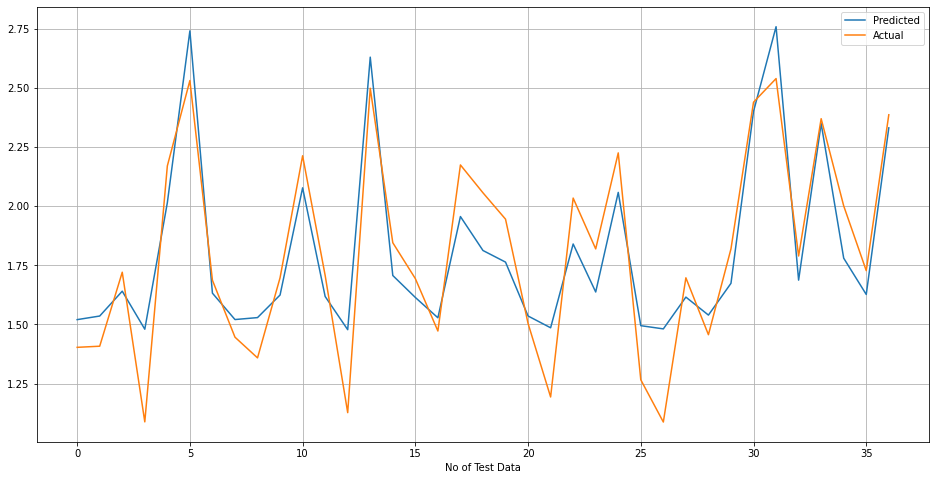

In [156]:
#Plot for predicted vs actual
plt.figure(figsize=(16,8))
plt.plot(y_lasso_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.grid()
plt.show()

**Cross Validification**

In [157]:
#importing GridSearchCV for finding the optimal parameter values from a given set of parameters in a grid.
from sklearn.model_selection import GridSearchCV

In [158]:
# Hyper-parameter Tuning

lasso_cv = Lasso()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_model = GridSearchCV(lasso_cv, parameters,scoring = 'neg_mean_squared_error',cv = 3)

In [159]:
#Training the model
lasso_model.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [160]:
#Finding the alpha value and negative mean squared error
print("The best fit alpha value is found out to be :" ,lasso_model.best_params_)
print("\nUsing ",lasso_model.best_params_, " the negative mean squared error is: ", lasso_model.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.03515384844892758


**Prediction of Lasso Regression**

In [162]:
#Prediction
y_pred_lasso = lasso_model.predict(x_test)

**Evaluation Matrices**

In [163]:
# Test Performance
print("MSE :",mean_squared_error(y_test, y_pred_lasso))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("MAE :",mean_absolute_error(y_test, y_pred_lasso))
print("R2 :",r2_score(y_test, y_pred_lasso))

MSE : 0.03222273336072056
RMSE : 0.17950691730604856
MAE : 0.15277731058358668
R2 : 0.8189732786857935


**Lasso Predication** 

**Predicted vs Actual After Validification**

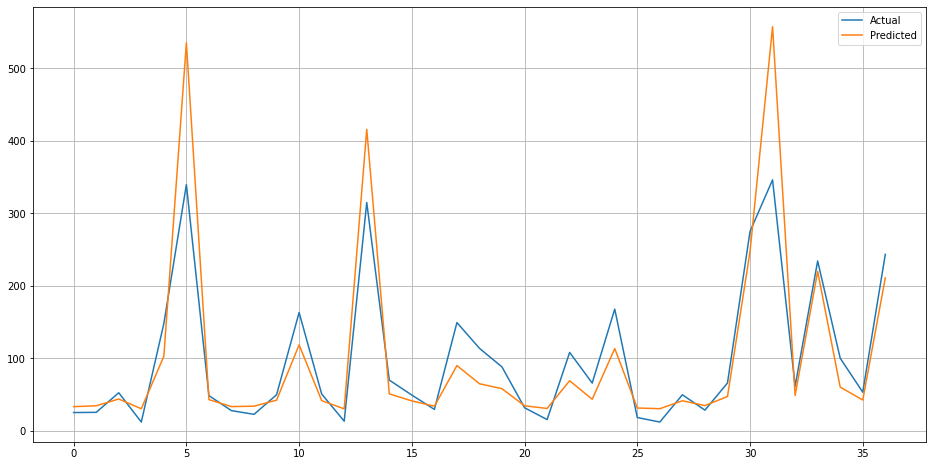

In [164]:
# Lasso Regression plotting
plt.figure(figsize=(16,8))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso))
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

#**Ridge Linear Regression**

In [165]:
#importing ridge
from sklearn.linear_model import Ridge

In [166]:
#training the model
ridge  = Ridge(alpha=0.1)
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [167]:
#ridge regression score
ridge.score(x_train, y_train)

0.81465524840887

**Prediction of Ridge Regression**

In [168]:
#Prediction
y_ridge_pred = ridge.predict(x_test)

**Evaluation Metrics**

In [169]:
# Test performance

print("MSE :",mean_squared_error(y_test, y_ridge_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_ridge_pred)))
print("MAE :",mean_absolute_error(y_test, y_ridge_pred))
print("R2 :",r2_score(y_test, y_ridge_pred))

MSE : 0.03165980533958239
RMSE : 0.17793202449132756
MAE : 0.15143117100922016
R2 : 0.8221357979190861


**RIDGE LINEAR Prediction** 

**Predicted vs Actual**

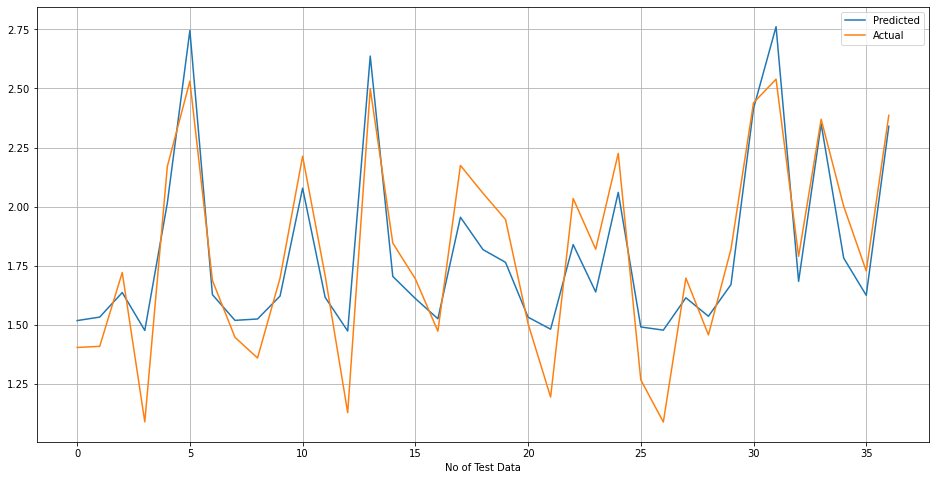

In [170]:
#Ridge regression plot
plt.figure(figsize=(16,8))
plt.plot(y_ridge_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.grid()
plt.show()

**Cross Validification of Ridge**

In [171]:
# Hyper-parameter Tuning
ridge_cv = Ridge()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_model = GridSearchCV(ridge_cv,parameters,scoring='neg_mean_squared_error',cv=3)
ridge_model.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [172]:
print("The best fit alpha value is found out to be :" ,ridge_model.best_params_)
print("\nUsing ",ridge_model.best_params_, " the negative mean squared error is: ", ridge_model.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -0.035198971562466846


**PREDICTION FOR CROSS VALIDIFICATION**

In [173]:
# Model Predication
y_pred_ridge  = ridge_model.predict(x_test)

In [174]:
# Test Performance
print("MSE :",mean_squared_error(y_test, y_pred_ridge))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("MAE :",mean_absolute_error(y_test, y_pred_ridge))
print("R2 :",r2_score(y_test, y_pred_ridge))

MSE : 0.03253593988266965
RMSE : 0.18037721553086924
MAE : 0.15307727568266652
R2 : 0.8172136902260576


**RIDGE LINEAR PREDICTION**
 
**ACTUAL VS PREDICTED AFTER VALIDIFICATION**

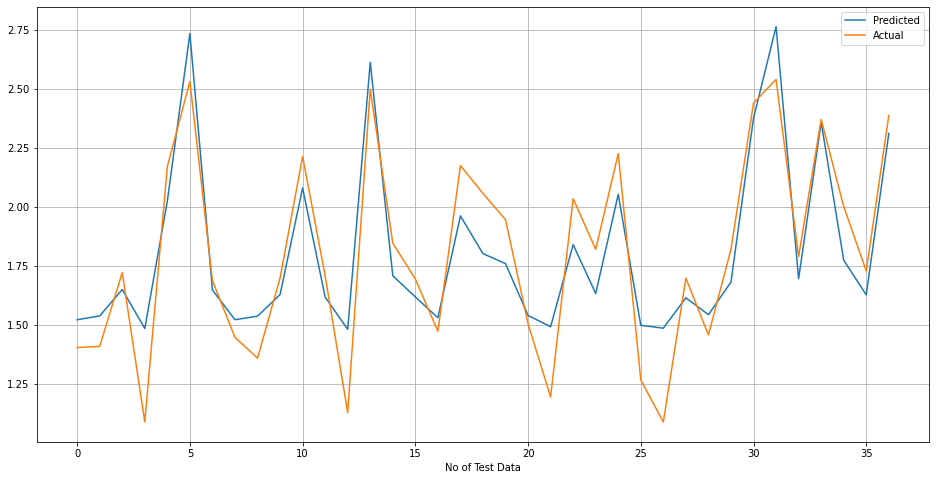

In [175]:
#Plot for actual vs predicted after cross validification
plt.figure(figsize=(16,8))
plt.plot(y_pred_ridge)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.grid()
plt.show()

# **ELASTIC NET LINEAR REGRESSION**

In [176]:
#import elastic net regression model
from sklearn.linear_model import ElasticNet

In [177]:
#train the model
elastic = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic.fit(x_train,y_train)

ElasticNet(alpha=0.1)

**PREDICTION**

In [178]:
#Finding the prediction
y_elastic_pred = elastic.predict(x_test)

**EVALUATION METRICS**

In [179]:
# Test Performance
print("MSE :",mean_squared_error(y_test, y_elastic_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_elastic_pred)))
print("MAE :",mean_absolute_error(y_test, y_elastic_pred))
print("R2 :",r2_score(y_test, y_elastic_pred))

MSE : 0.03640066957363815
RMSE : 0.19078959503504941
MAE : 0.15744198421541944
R2 : 0.7955017101500742


**Elastic Net Predication** 

**Predicted vs Actual (After Validification)**

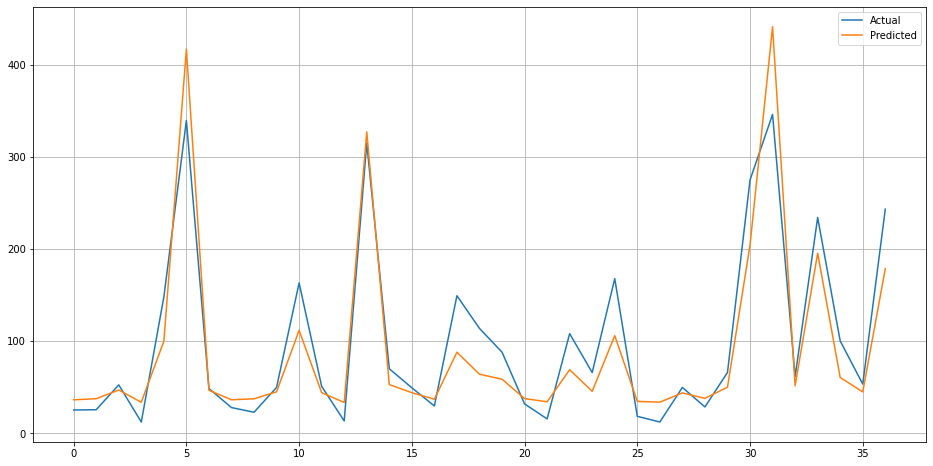

In [180]:
#Plot for Elastic Net Linear Regression
plt.figure(figsize=(16,8))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_elastic_pred))
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

In [181]:
# Function to run all model 
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
def score_model(x_train,y_train,x_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns) # Creating dataframe to store the train and test metrics for each of the models
    
    i=0
    
    #Reading model one by one
    for model in models:
        model.fit(x_train,y_train)
        
        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)

        #Computing evaluation metrics
        train_accuracy=model.score(x_train,y_train)
        test_accuracy=model.score(x_test,y_test)
        
        MAE=metrics.mean_absolute_error(y_test, y_pred_test)
        MSE=metrics.mean_squared_error(y_test, y_pred_test)
        RMSE=math.sqrt(MSE)
        # MAPE=mape(y_test, y_pred_test)
        Rsquare=metrics.r2_score(y_test, y_pred_test)
        
        
        #Inserting in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"MAE"]=round(MAE,3)
        df.loc[i,"MSE"]=round(MSE,3)
        df.loc[i,"RMSE"]=round(RMSE,3)
        # df.loc[i,"MAPE"]=round(MAPE,3)
        df.loc[i,"Rsquare"]=round(Rsquare,3)
        
        i+=1
    
    #Sorting values by accuracy
    df.sort_values(by=['Rsquare'],ascending=False,inplace=True)
    
    return df

In [182]:
models = [regressor,lasso,ridge,elastic]

In [183]:
#Testing performance
report=score_model(x_train,y_train,x_test,y_test)
report

,Model_Name,MAE,MSE,RMSE,Rsquare
0,LinearRegression,0.151,0.032,0.178,0.823
2,Ridge,0.151,0.032,0.178,0.822
1,Lasso,0.152,0.032,0.179,0.820
3,ElasticNet,0.157,0.036,0.191,0.796
